<a href="https://colab.research.google.com/github/gspandhana/MachineLearning/blob/main/P6_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression: When a line won't cut it!
![picture](https://drive.google.com/uc?export=view&id=1vwiZL5wvJjIgRHVhA3ptZcS7ehagTKCs)



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/data

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
# Read the data from 'poly.csv' into a Pandas dataframe
df = pd.read_csv('poly.csv')

# Take a quick look at the dataframe
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


In [ ]:
# Get the column values for x & y as numpy arrays
x = df[['x']].values
y = df[['y']].values

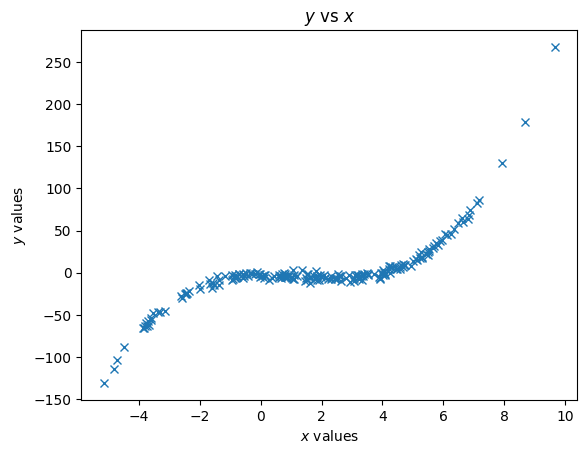

In [ ]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$')
plt.show();

In [ ]:
# Split the data into train and test sets
# Set the train size to 0.8 and random seed to 22
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 22 )

In [ ]:
# Initialize a linear model
model = LinearRegression()

# Fit the model on the train data
model.fit(x_train, y_train)

# Get the predictions on the test data using the trained model
y_lin_pred = model.predict(x_test)

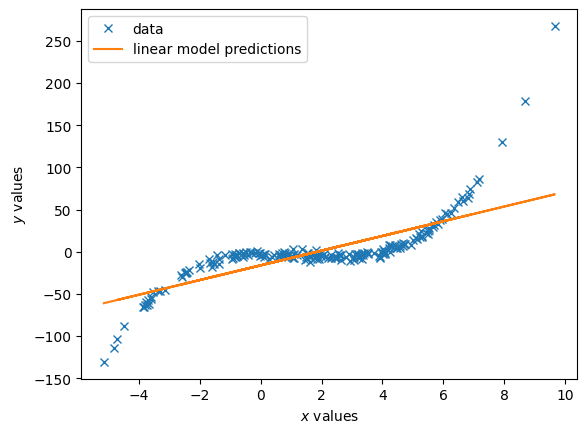

In [ ]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(x,y,'x', label='data')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.plot(x_test, y_lin_pred, label='linear model predictions')
plt.legend();

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def get_poly_pred(x_train, x_test, y_train, degree=1):

    # Generate polynomial features on the train data
    x_poly_train= PolynomialFeatures(degree=degree).fit_transform(x_train)

    # Generate polynomial features on the test data
    print(x_train.shape, x_test.shape, y_train.shape)
    x_poly_test= PolynomialFeatures(degree=degree).fit_transform(x_test)

    # Initialize a model to perform polynomial regression
    polymodel = LinearRegression()

    # Fit the model on the polynomial transformed train data
    polymodel.fit(x_poly_train, y_train)

    # Predict on the entire polynomial transformed test data
    y_poly_pred = polymodel.predict(x_poly_test)
    return y_poly_pred

In [ ]:
### edTest(test_deg) ###
# Guess the correct polynomial degree based on the above graph
guess_degree = 3

# Predict on the entire polynomial transformed test data using helper function.
y_poly_pred = get_poly_pred(x_train, x_test, y_train, degree=guess_degree)

(160, 1) (40, 1) (160, 1)


In [ ]:
# Helper code to visualise the results
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y
# y values corresponding to sorted test data
y_test = y_test[idx]

# Linear predicted values
y_lin_pred = y_lin_pred[idx]

# Non-linear predicted values
y_poly_pred= y_poly_pred[idx]

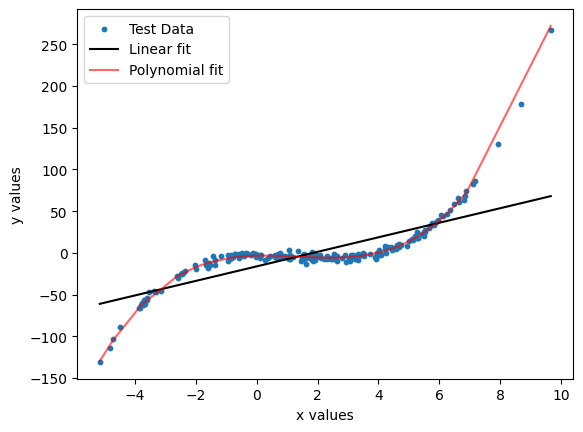

In [ ]:
# First plot x & y values using plt.scatter
plt.scatter(x, y, s=10, label="Test Data")

# Plot the linear regression fit curve
plt.plot(x_test,y_lin_pred,label="Linear fit", color='k')

# Plot the polynomial regression fit curve
plt.plot(x_test, y_poly_pred, label="Polynomial fit",color='red', alpha=0.6)

# Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [ ]:
# Calculate the residual values for the polynomial model and the linear model
poly_residuals = y_test - y_poly_pred
lin_residuals = y_test - y_lin_pred

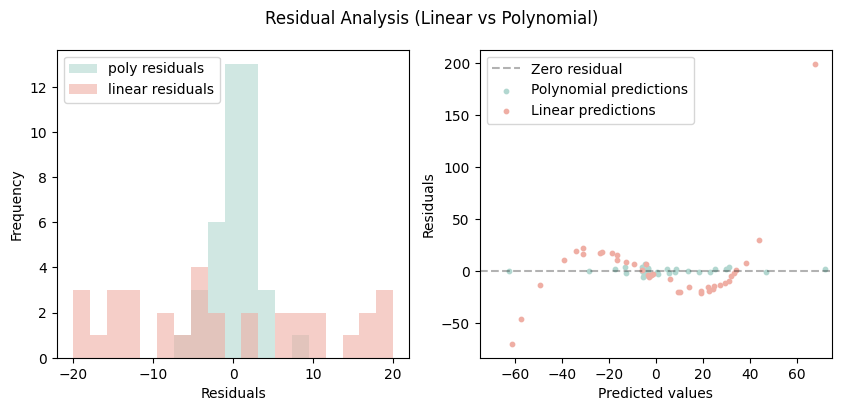

In [ ]:
# Helper code to plot the residual values
# Plot the histograms of the residuals for the two cases

# Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins, label = 'poly residuals', color='#B2D7D0', alpha=0.6)

# Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label = 'linear residuals', color='#EFAEA4', alpha=0.6)

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].hlines(0,-75,75, color='k', ls='--', alpha=0.3, label='Zero residual')
ax[1].scatter(y_poly_pred, poly_residuals, s=10, color='#B2D7D0', label='Polynomial predictions')
ax[1].scatter(y_lin_pred, lin_residuals, s = 10, color='#EFAEA4', label='Linear predictions' )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].legend(loc = 'upper left')
fig.suptitle('Residual Analysis (Linear vs Polynomial)')
plt.show();